# Image Classification - Lab

## Introduction

Now that you have a working knowledge of CNNs and have practiced implementing associated techniques in Keras, its time to put all of those skills together. In this lab, you'll work to complete a [Kaggle competition](https://www.kaggle.com/c/dog-breed-identification) on classifying dog breeds.


## Objectives

In this lab you will: 

- Compare and apply multiple techniques for tuning a model using data augmentation and pretrained models  

## Download and Load the Data

Start by downloading the data locally and loading it into a Pandas DataFrame. Be forewarned that this dataset is fairly large and it is advisable to close other memory intensive applications.

The data can be found [here](https://www.kaggle.com/c/dog-breed-identification/data).

It's easiest if you download the data into this directory on your local computer. From there, be sure to uncompress the folder and subfolders. If you download the data elsewhere, be sure to modify the file path when importing the file below.

In [1]:
# No code per se, but download and decompress the data
!ls

Baseline_CNN.h5
Baseline_CNN_dog_subset_run2.h5
CONTRIBUTING.md
data_org_subset
dog_breeds
history_vgg19__3breeds_4epochs.pickle
history_vgg19_10epochs.pickle
index.ipynb
LICENSE.md
multiclass_cnfmatx.png
README.md
test
train
val
vgg19_3breeds_4epochs.h5
vgg19_FE_AUG_10epochs.h5
vgg19_FE_AUG_15epochs.h5


In [2]:
import pandas as pd
import numpy as np

## Preprocessing

Now that you've downloaded the data, its time to prepare it for some model building! You'll notice that the current structure provided is not the same as our lovely preprocessed folders that you've been given to date. Instead, you have one large training folder with images and a csv file with labels associated with each of these file types. 

Use this to create a directory substructure for a train-validation-test split as we have done previously. Also recall that you'll also want to use one-hot encoding as you are now presented with a multi-class problem as opposed to simple binary classification.

In [3]:
# Your code here; open the labels.csv file stored in the zip file

In [4]:
!ls -lt dog_breeds/train/ | head -5

total 373708
-rw-r--r-- 1 deon 197609   43452 Feb 28 19:00 fff43b07992508bc822f33d8ffd902ae.jpg
-rw-r--r-- 1 deon 197609   40384 Feb 28 19:00 ffe5f6d8e2bff356e9482a80a6e29aac.jpg
-rw-r--r-- 1 deon 197609   23065 Feb 28 19:00 ffe2ca6c940cddfee68fa3cc6c63213f.jpg
-rw-r--r-- 1 deon 197609   38920 Feb 28 19:00 ffd3f636f7f379c51ba3648a9ff8254f.jpg


ls: write error


In [5]:
df = pd.read_csv('dog_breeds/labels.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [6]:
df['breed'].nunique(),  df['breed'].unique()

(120,
 array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
        'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
        'shetland_sheepdog', 'walker_hound', 'maltese_dog',
        'norfolk_terrier', 'african_hunting_dog',
        'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
        'doberman', 'otterhound', 'standard_schnauzer',
        'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
        'affenpinscher', 'labrador_retriever', 'ibizan_hound',
        'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
        'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
        'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
        'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
        'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
        'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
        'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'pap

In [7]:
!ls -lt dog_breeds/test/ | head -5

total 375272
-rw-r--r-- 1 deon 197609   60993 Feb 28 18:56 fffbff22c1f51e3dc80c4bf04089545b.jpg
-rw-r--r-- 1 deon 197609   22315 Feb 28 18:56 fff7d50d848e8014ac1e9172dc6762a3.jpg
-rw-r--r-- 1 deon 197609   10120 Feb 28 18:56 fff74b59b758bbbf13a5793182a9bbe4.jpg
-rw-r--r-- 1 deon 197609   27101 Feb 28 18:56 fff1ec9e6e413275984966f745a313b0.jpg


ls: write error



In order to input the data into our standard pipeline, you'll need to organize the image files into a nested folder structure. At the top level will be a folder for the training data, a folder for the validation data, and a folder for the test data. Within these top directory folders, you'll then need to create a folder for each of the categorical classes (in this case, dog breeds). Finally, within these category folders you'll then place each of the associated image files. To save time, do this for just 3 of the dog breeds such as `'boston_bull'`, `'toy_poodle'`, and `'scottish_deerhound'`.

You're nested file structure should look like this:
* train
    * category_1
    * category_2
    * category_3
    ...
* val
    * category_1
    * category_2
    * category_3
    ...
* test 
    * category_1
    * category_2
    * category_3
    ...  

> **Hint**: To do this, you can use the `os` module which will you can use to execute many common bash commands straight from your python interpreter. For example, here's how you could make a new folder: 

```python
import os
os.mkdir('New_Folder_Name')
```
Start by creating top level folders for the train, validation, and test sets. Then, use your pandas DataFrame to split the example images for each breed of dog into a 80% train set, and 10% validation and test sets. Use `os.path.join()` with the information from the DataFrame to construct the relevant file path. With this, place the relevant images using the `shutil.copy()` into the appropriate directory. 

>> **Note**: It is worthwhile to try this exercise on your own, but you can also use the images stored under the `'data_org_subset/'` folder of this repository, in which the Kaggle dataset has already been subset and preprocessed.

In [8]:
# import os
# os.mkdir('./train')
# os.mkdir('./test')
# os.mkdir('./val')

In [9]:
print('Number of unique breeds:', df.breed.nunique())
print(df.breed.value_counts()[:10])

Number of unique breeds: 120
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
great_pyrenees          111
pomeranian              111
basenji                 110
samoyed                 109
Name: breed, dtype: int64


In [10]:
import numpy as np
import os, shutil

old_dir = 'dog_breeds/train/'

new_root_dir = 'data_org_subset/'
# Because this cell has already been run and this directory now exists, running this cell again will throw an error
# os.mkdir(new_root_dir) 

dir_names = ['train', 'val', 'test']
for d in dir_names:
    new_dir = os.path.join(new_root_dir, d)
    #os.mkdir(new_dir)
    
for breed in ['boston_bull', 'toy_poodle', 'scottish_deerhound']:
    print('Moving {} pictures.'.format(breed))
    # Create sub_directories
    for d in dir_names:
        new_dir = os.path.join(new_root_dir, d, breed)
        #os.mkdir(new_dir)
    # Subset dataframe into train, validate and split sets
    # Split is performed here to ensure maintain class distributions.
    temp = df[df.breed == breed]
    train, validate, test = np.split(temp.sample(frac=1), [int(.8*len(temp)), int(.9*len(temp))])
    print('Split {} imgs into {} train, {} val, and {} test examples.'.format(len(temp),
                                                                              len(train),
                                                                              len(validate),
                                                                              len(test)))
    for i, temp in enumerate([train, validate, test]):
        for row in temp.index:
            filename = temp['id'][row] + '.jpg'
            origin = os.path.join(old_dir + filename)
            destination = os.path.join(new_root_dir + dir_names[i] + '/' + breed + '/' + filename)
            shutil.copy(origin, destination)

Moving boston_bull pictures.
Split 87 imgs into 69 train, 9 val, and 9 test examples.
Moving toy_poodle pictures.
Split 80 imgs into 64 train, 8 val, and 8 test examples.
Moving scottish_deerhound pictures.
Split 126 imgs into 100 train, 13 val, and 13 test examples.


In [11]:
# Your code here; transform the image files and then load them into Keras as tensors 
# (be sure to perform a train-val-test split)

In [12]:
# Your code here
from keras.preprocessing.image import ImageDataGenerator

train_dir = '{}train'.format(new_root_dir)

validation_dir = '{}val/'.format(new_root_dir)
test_dir = '{}test/'.format(new_root_dir)

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=20, 
                                                        class_mode='categorical')

# Found 233 images belonging to 3 classes.
# Found 30 images belonging to 3 classes.

Using TensorFlow backend.


Found 293 images belonging to 3 classes.
Found 106 images belonging to 3 classes.


In [13]:
train_generator.class_indices
#{'boston_bull': 0, 'scottish_deerhound': 1, 'toy_poodle': 2}

{'boston_bull': 0, 'scottish_deerhound': 1, 'toy_poodle': 2}

## Optional: Build a Baseline CNN

This is an optional step. Adapting a pretrained model will produce better results, but it may be interesting to create a CNN from scratch as a baseline. If you wish to, do so here.

In [14]:
# Create a baseline CNN model
import datetime
start = datetime.datetime.now()


from keras import models
from keras import layers
from keras import optimizers


In [15]:
# Build CNN Model

cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
cnn.add(layers.MaxPooling2D(2,2))  # Reduce Feature Map to (2,2)
cnn.add(layers.Conv2D(64, (3,3), activation='relu',))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Conv2D(128, (3,3), activation='relu',))
cnn.add(layers.MaxPooling2D(2,2))
# cnn.add(layers.Conv2D(128, (3,3), activation='relu',))
# cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Flatten())  # Convert input to vector on values into nn dense layer
cnn.add(layers.Dense(units=64, activation='relu'))
cnn.add(layers.Dense(units=128, activation='relu'))
cnn.add(layers.Dense(units=256, activation='relu'))
#cnn.add(layers.Dense(units=512, activation='relu'))
cnn.add(layers.Dense(units=3, activation='softmax'))  # Output layer with (3-known labels)

In [16]:
# Compile CNN Model
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

history = cnn.fit_generator(train_generator,
                            steps_per_epoch = 50,  # = 100
                            epochs=10,
                            validation_data=validation_generator,
                            validation_steps = 25) # = 50 )

Epoch 1/10
50/50 [==============================] - 41s 825ms/step - loss: 1.0462 - accuracy: 0.4617 - val_loss: 0.8731 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 38s 766ms/step - loss: 0.6336 - accuracy: 0.7500 - val_loss: 0.5232 - val_accuracy: 0.8018
Epoch 3/10
50/50 [==============================] - 39s 784ms/step - loss: 0.1603 - accuracy: 0.9489 - val_loss: 0.0053 - val_accuracy: 0.9707
Epoch 4/10
50/50 [==============================] - 38s 769ms/step - loss: 0.0545 - accuracy: 0.9826 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/10
50/50 [==============================] - 38s 765ms/step - loss: 0.0135 - accuracy: 0.9979 - val_loss: 5.2362e-04 - val_accuracy: 1.0000
Epoch 6/10
50/50 [==============================] - 38s 768ms/step - loss: 0.1371 - accuracy: 0.9530 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 7/10
50/50 [==============================] - 38s 764ms/step - loss: 0.0207 - accuracy: 0.9959 - val_loss: 5.8953e-04 - val_accuracy

In [17]:
end = datetime.datetime.now()
time_elapsed = start-end
print(f'Training took a Total of - Time Elapsed: {time_elapsed}')

Training took a Total of - Time Elapsed: -1 day, 23:53:28.979481


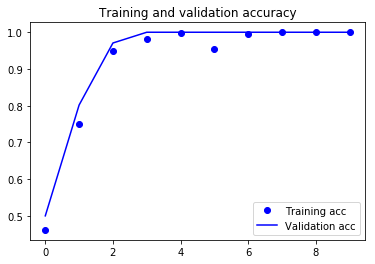

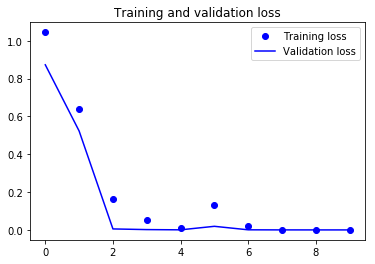

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
cnn.save('Baseline_CNN_dog_subset_run2.h5')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='categorical',
                                                  shuffle=False)

test_loss, test_acc = cnn.evaluate_generator(test_generator, steps=54)
y_hat_test = cnn.predict_generator(test_generator, steps=54)
print('Generated {} predictions'.format(len(y_hat_test)))
print('test acc:', test_acc)

# Found 30 images belonging to 3 classes.
# Generated 810 predictions
# test acc: 0.7333333492279053

Found 101 images belonging to 3 classes.
Generated 909 predictions
test acc: 1.0


## Loading a Pretrained CNN

## Feature Engineering with the Pretrained Model

As you may well have guessed, adapting a pretrained model will undoubtedly produce better results then a fresh CNN due to the limited size of training data. Import a pretrained model such as VGG-19 to use a convolutional base. Use this to transform the dataset into a rich feature space and add a few fully connected layers on top of the pretrained layers to build a classification model. (Be sure to leave the pretrained model frozen!)

In [20]:
# Your code here; add fully connected layers on top of the convolutional base

In [21]:
# Your code here; add fully connected layers on top of the convolutional base
# from keras.preprocessing.image import ImageDataGenerator, array_to_img

# Initialize Base
from keras.applications import VGG19
cnn_base = VGG19(weights='imagenet',
                 include_top=False,
                 input_shape=(240, 240, 3))

# Define Model Architecture -----------  QUESTION:  Should I be using cnn. (instead of model. ?)
cnn = models.Sequential()
cnn.add(cnn_base)
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(128, activation='relu'))
cnn.add(layers.Dense(256, activation='relu'))
cnn.add(layers.Dense(128, activation='relu'))
cnn.add(layers.Dense(3, activation='softmax'))

cnn_base.trainable = False

# You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute
for layer in cnn.layers:
    print(layer.name, layer.trainable)
    
# Similarly, we can check how many trainable weights are in the model 
print(len(cnn.trainable_weights))

cnn.summary()

# vgg19 False
# flatten_1 True
# dense_1 True
# dense_2 True
# dense_3 True
# dense_4 True
# dense_5 True
# 10


# model.
# vgg19 False
# flatten_3 True
# dense_8 True
# dense_9 True
# dense_10 True
# dense_11 True
# dense_12 True
# 10
# Model: "sequential_7"

vgg19 False
flatten_2 True
dense_5 True
dense_6 True
dense_7 True
dense_8 True
dense_9 True
10
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________

In [22]:
# Preprocessing/Problem Setup
new_root_dir = 'data_org_subset/'

train_dir = '{}train'.format(new_root_dir)
validation_dir = '{}val/'.format(new_root_dir)
test_dir = '{}test/'.format(new_root_dir)

original_start = datetime.datetime.now()
start = datetime.datetime.now()

# Define Initial Parameters (same as previous code block)
datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 10

# Get all the data in the directory split/train (542 images), and reshape them
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(240, 240), 
                                                    batch_size= 20,
                                                    class_mode='categorical') 

# Get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(validation_dir, 
                                                                       target_size=(240, 240), 
                                                                       batch_size=20,
                                                                       class_mode='categorical')

# Get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir, 
                                                                        target_size=(240, 240), 
                                                                        batch_size=180,
                                                                        class_mode='categorical',
                                                                        shuffle=False)

        
test_images, test_labels = next(test_generator)


# Compilation
cnn.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

# Fitting the Model
history = cnn.fit_generator(train_generator,
                              steps_per_epoch=8,
                              epochs=4,
                              validation_data=val_generator,
                              validation_steps=10)


end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

Found 293 images belonging to 3 classes.
Found 106 images belonging to 3 classes.
Found 101 images belonging to 3 classes.
Epoch 1/4
8/8 [==============================] - 160s 20s/step - loss: 1.0840 - acc: 0.4062 - val_loss: 0.9809 - val_acc: 0.5323
Epoch 2/4
8/8 [==============================] - 147s 18s/step - loss: 1.0730 - acc: 0.4314 - val_loss: 0.9783 - val_acc: 0.4884
Epoch 3/4
8/8 [==============================] - 146s 18s/step - loss: 1.0464 - acc: 0.4248 - val_loss: 0.9738 - val_acc: 0.5698
Epoch 4/4
8/8 [==============================] - 156s 20s/step - loss: 0.9842 - acc: 0.5125 - val_loss: 0.9412 - val_acc: 0.6183
Training took a total of 0:10:11.218318


## Visualize History

Now fit the model and visualize the training and validation accuracy/loss functions over successive epochs.

In [23]:
# Your code here; visualize the training / validation history associated with fitting the model

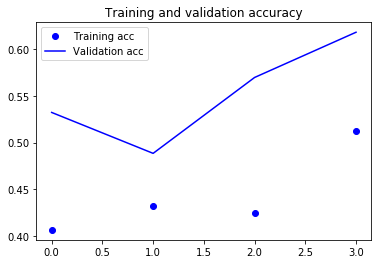

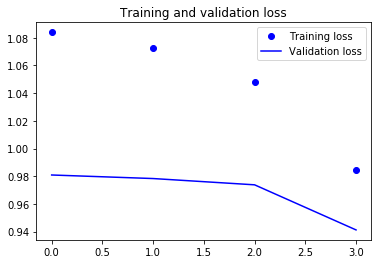

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
# Save model
cnn.save('vgg19_3breeds_4epochs.h5')
import pickle

with open('history_vgg19__3breeds_4epochs.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available
    pickle.dump(history, f, pickle.HIGHEST_PROTOCOL)

## Final Model Evaluation

Now that you've trained and validated the model, perform a final evaluation of the model on the test set.

In [26]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(240, 240),
                                                  batch_size=20,
                                                  class_mode='categorical',
                                                  shuffle=False)

test_loss, test_acc = cnn.evaluate_generator(test_generator, steps=54)
y_hat_test = cnn.predict_generator(test_generator, steps=54)
print('Generated {} predictions'.format(len(y_hat_test)))
print('test acc:', test_acc)
# Found 30 images belonging to 3 classes.
# Generated 810 predictions
# test acc: 0.7086419760261053

# model. results
# Found 58 images belonging to 3 classes.
# Generated 1044 predictions
# test acc: 0.6293103694915771

Found 101 images belonging to 3 classes.
Generated 909 predictions
test acc: 0.5676567554473877


## Summary

Congratulations! In this lab, you brought all of your prior deep learning skills together from preprocessing including one-hot encoding, to adapting a pretrained model. There are always ongoing advancements in CNN architectures and best practices, but you have a solid foundation and understanding at this point.